In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# modelleme kütüphaneleri

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 56.9 gigabytes of available RAM

You are using a high-RAM runtime!


In [58]:
path_files= ["/content/drive/MyDrive/veri seti-tt/capstone/capstone.1.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.2.jsonl","/content/drive/MyDrive/veri seti-tt/capstone/capstone.3.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.4.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.5.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.6.jsonl" , "/content/drive/MyDrive/veri seti-tt/capstone/capstone.7.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.8.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.9.jsonl", "/content/drive/MyDrive/veri seti-tt/capstone/capstone.10.jsonl"]
for i in path_files:
  print(i)

/content/drive/MyDrive/veri seti-tt/capstone/capstone.1.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.2.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.3.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.4.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.5.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.6.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.7.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.8.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.9.jsonl
/content/drive/MyDrive/veri seti-tt/capstone/capstone.10.jsonl


In [59]:
dfs = [pl.read_ndjson(fp) for fp in path_files]

In [60]:
df_polars = pl.concat(dfs, how="vertical")

In [61]:
df=df_polars.to_pandas()

In [62]:
df.to_csv("df_concat.csv")

# pandas

In [90]:
df = pd.read_csv("/content/df_concat.csv")

In [91]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


In [92]:
train_df.to_csv("train_df.csv")
val_df.to_csv("val_df.csv")
test_df.to_csv("test_df.csv")

In [93]:
df = train_df.copy()
val_df2 = val_df.copy()


In [114]:
val_df = val_df2.copy()

In [113]:
test_df  = pd.read_csv("/content/test_df.csv")

In [103]:
val_df.churn.value_counts()

,count
churn,
False,986679
True,13321


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000000 entries, 3525669 to 6423388
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   id                      object 
 2   age                     int64  
 3   tenure                  float64
 4   service_type            object 
 5   avg_call_duration       float64
 6   data_usage              float64
 7   roaming_usage           float64
 8   monthly_charge          float64
 9   overdue_payments        int64  
 10  auto_payment            object 
 11  avg_top_up_count        int64  
 12  call_drops              float64
 13  customer_support_calls  int64  
 14  satisfaction_score      float64
 15  apps                    object 
 16  churn                   bool   
dtypes: bool(1), float64(7), int64(5), object(4)
memory usage: 1.0+ GB


In [37]:
df.select_dtypes(include=['number']).corr()


,Unnamed: 0,age,tenure,avg_call_duration,data_usage,roaming_usage,monthly_charge,overdue_payments,avg_top_up_count,call_drops,customer_support_calls,satisfaction_score
Unnamed: 0,1.000000,-0.000071,0.000334,-0.000353,-0.000405,0.000519,0.000528,0.000131,0.000360,0.000166,-0.000151,-0.000033
age,-0.000071,1.000000,0.171404,-0.000556,0.000522,-0.000075,-0.351179,0.367916,-0.477504,0.000525,-0.000081,0.000465
tenure,0.000334,0.171404,1.000000,-0.000122,-0.000051,0.000013,-0.035683,0.037335,-0.048827,0.000268,0.000116,-0.000093
avg_call_duration,-0.000353,-0.000556,-0.000122,1.000000,-0.000380,0.001218,-0.000317,-0.000219,0.000780,0.000014,-0.000758,-0.000017
data_usage,-0.000405,0.000522,-0.000051,-0.000380,1.000000,0.000133,-0.000315,0.000949,-0.000993,-0.000048,0.000055,-0.000329
roaming_usage,0.000519,-0.000075,0.000013,0.001218,0.000133,1.000000,0.000045,-0.000475,0.000070,-0.000387,-0.000477,0.000690
monthly_charge,0.000528,-0.351179,-0.035683,-0.000317,-0.000315,0.000045,1.000000,-0.398875,0.518872,-0.000201,-0.000156,0.000114
overdue_payments,0.000131,0.367916,0.037335,-0.000219,0.000949,-0.000475,-0.398875,1.000000,-0.542364,0.000196,0.000245,0.000113
avg_top_up_count,0.000360,-0.477504,-0.048827,0.000780,-0.000993,0.000070,0.518872,-0.542364,1.000000,-0.000714,-0.000338,-0.000091
call_drops,0.000166,0.000525,0.000268,0.000014,-0.000048,-0.000387,-0.000201,0.000196,-0.000714,1.000000,0.000774,0.000058


In [104]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
tenure,19866
service_type,0
avg_call_duration,2931242
data_usage,399493
roaming_usage,2664895
monthly_charge,199780
overdue_payments,0


In [106]:
broadband_nulls = df[df['service_type'] == 'Broadband'].isnull().sum()
print(broadband_nulls[broadband_nulls > 0])


tenure                  6674
avg_call_duration    2664895
data_usage            133204
roaming_usage        2664895
monthly_charge         66709
auto_payment            3287
call_drops           2664895
dtype: int64


### service type broadbandken sesli görüşme kaydı null olanlar 0landı

In [115]:
df.loc[(df["service_type"] == "Broadband") & df["call_drops"].isna(), "call_drops"] = 0
val_df.loc[(val_df["service_type"] == "Broadband") & val_df["call_drops"].isna(), "call_drops"] = 0
test_df.loc[(test_df["service_type"] == "Broadband") & test_df["call_drops"].isna(), "call_drops"] = 0

In [116]:
df.loc[(df["service_type"] == "Broadband") & df["roaming_usage"].isna(), "roaming_usage"] = 0
val_df.loc[(val_df["service_type"] == "Broadband") & val_df["roaming_usage"].isna(), "roaming_usage"] = 0
test_df.loc[(test_df["service_type"] == "Broadband") & test_df["roaming_usage"].isna(), "roaming_usage"] = 0


In [117]:
df.loc[(df["service_type"] == "Broadband") & df["avg_call_duration"].isna(), "avg_call_duration"] = 0
val_df.loc[(val_df["service_type"] == "Broadband") & val_df["avg_call_duration"].isna(), "avg_call_duration"] = 0
test_df.loc[(test_df["service_type"] == "Broadband") & test_df["avg_call_duration"].isna(), "avg_call_duration"] = 0

In [111]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
tenure,19866
service_type,0
avg_call_duration,266347
data_usage,399493
roaming_usage,0
monthly_charge,199780
overdue_payments,0


### autotype: service type prepaid olanların auto paymentı olamaz false yaparız

In [112]:
df.groupby("service_type")["auto_payment"].value_counts(dropna=False)

service_type  auto_payment
Broadband     True            1330935
              False           1330673
              NaN                3287
Postpaid      False           1332274
              True            1330466
              NaN                3374
Prepaid       NaN             2668991
Name: count, dtype: int64

In [118]:
df.loc[(df["service_type"] == "Prepaid") & df["auto_payment"].isna(), "auto_payment"] = False
val_df.loc[(val_df["service_type"] == "Prepaid") & val_df["auto_payment"].isna(), "auto_payment"] = False
test_df.loc[(test_df["service_type"] == "Prepaid") & test_df["auto_payment"].isna(), "auto_payment"] = False


### gecikmiş ödemeleri 1den fazla olanları otomatik ödemesi yoktur diyorum diğerlerine true olarka değiştiriyorum

In [130]:
df.loc[df['overdue_payments'] > 1, 'auto_payment'] = df.loc[df['overdue_payments'] > 1, 'auto_payment'].fillna(False)
val_df.loc[val_df['overdue_payments'] > 1, 'auto_payment'] = val_df.loc[val_df['overdue_payments'] > 1, 'auto_payment'].fillna(False)
test_df.loc[test_df['overdue_payments'] > 1, 'auto_payment'] = test_df.loc[test_df['overdue_payments'] > 1, 'auto_payment'].fillna(False)



In [132]:
df.loc[df['overdue_payments'] <= 1, 'auto_payment'] = df.loc[df['overdue_payments'] <= 1, 'auto_payment'].fillna(True)
val_df.loc[val_df['overdue_payments'] <= 1, 'auto_payment'] = val_df.loc[val_df['overdue_payments'] <= 1, 'auto_payment'].fillna(True)
test_df.loc[test_df['overdue_payments'] <= 1, 'auto_payment'] = test_df.loc[test_df['overdue_payments'] <= 1, 'auto_payment'].fillna(True)

In [133]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
tenure,19866
service_type,0
avg_call_duration,266347
data_usage,399493
roaming_usage,0
monthly_charge,199780
overdue_payments,0


In [121]:
df.groupby("service_type")["avg_call_duration"].value_counts(dropna=False)

service_type  avg_call_duration
Broadband     0.00                 2664895
Postpaid      NaN                   132992
              45.50                    270
              32.19                    264
              109.00                   264
                                    ...   
Prepaid       83.14                    166
              73.67                    165
              5.03                     162
              120.00                   113
              1.00                      90
Name: count, Length: 23805, dtype: int64

In [122]:
df.groupby(["avg_top_up_count", "service_type"])["monthly_charge"].value_counts()


avg_top_up_count  service_type  monthly_charge
0                 Broadband     348.93            129
                                484.80            126
                                288.79            125
                                354.99            123
                                202.24            122
                                                 ... 
100               Prepaid       2499.73             1
                                2499.80             1
                                2499.84             1
                                2499.85             1
                                2499.97             1
Name: count, Length: 2609643, dtype: int64

In [134]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
tenure,19866
service_type,0
avg_call_duration,266347
data_usage,399493
roaming_usage,0
monthly_charge,199780
overdue_payments,0


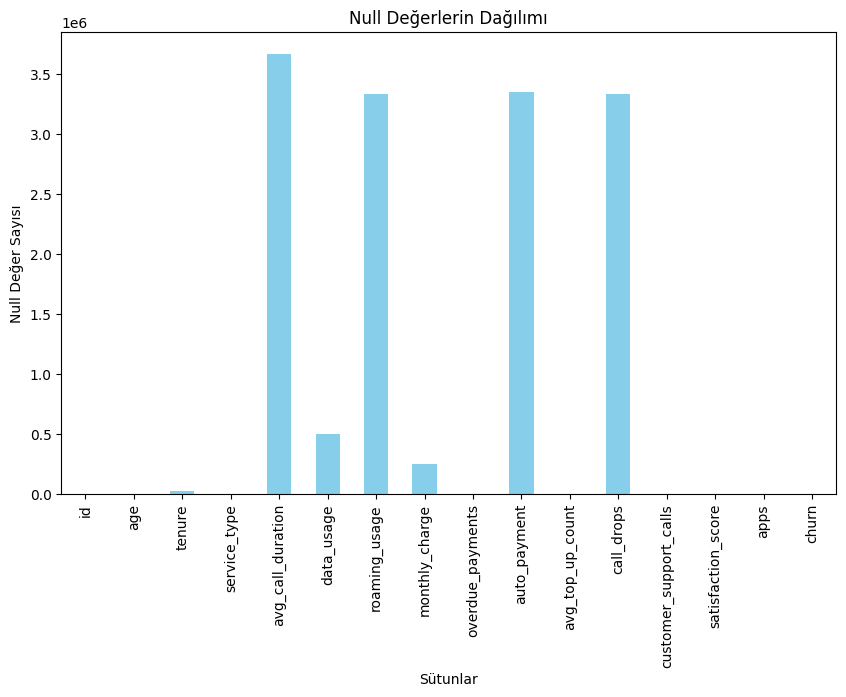

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nulls = df.isnull().sum()

plt.figure(figsize=(10,6))
nulls.plot(kind='bar', color='skyblue')
plt.title('Null Değerlerin Dağılımı')
plt.ylabel('Null Değer Sayısı')
plt.xlabel('Sütunlar')
plt.xticks(rotation=90)
plt.show()


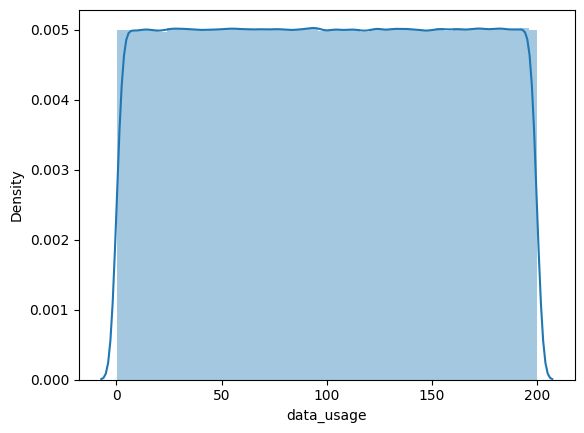

In [124]:
sns.distplot(df['data_usage'])
plt.show()

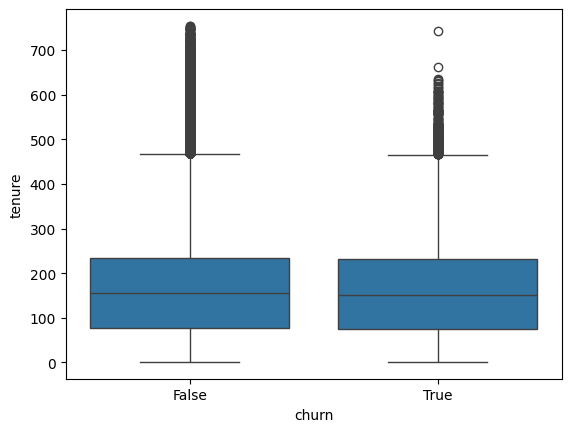

In [ ]:
sns.boxplot(x = "churn",
            y = "tenure",
            data = df)

plt.show()

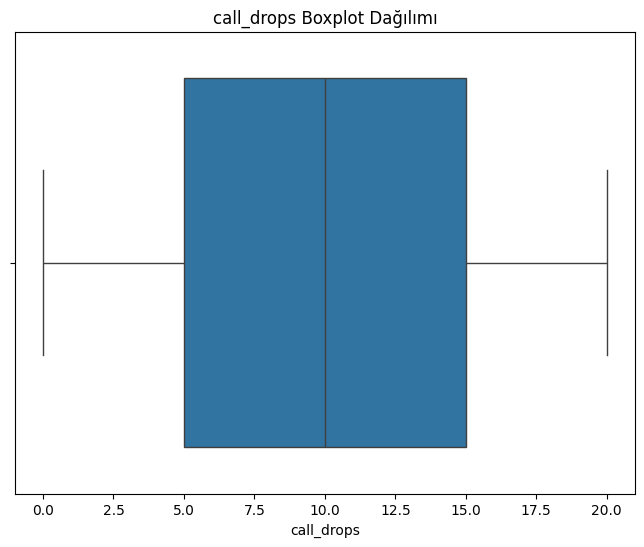

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirmek istediğin tek sütun
column_to_plot = 'call_drops'  # Örneğin, 'age' sütunu

# Boxplot çizimi
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_to_plot].dropna())  # Null değerleri atarak çizim
plt.title(f'{column_to_plot} Boxplot Dağılımı')
plt.show()


In [136]:
df_copy_2 = df.copy()
val_copy2 = val_df.copy()
test_copy2 = test_df.copy()

In [146]:
df['avg_call_duration'] = df.groupby('service_type')['avg_call_duration'].transform(lambda x: x.fillna(x.mean()))
df['data_usage'] = df.groupby('service_type')['data_usage'].transform(lambda x: x.fillna(x.mean()))
df['monthly_charge'] = df.groupby('service_type')["monthly_charge"].transform(lambda x: x.fillna(x.mean()))

val_df['avg_call_duration'] = val_df.groupby('service_type')['avg_call_duration'].transform(lambda x: x.fillna(x.mean()))
val_df['data_usage'] = val_df.groupby('service_type')['data_usage'].transform(lambda x: x.fillna(x.mean()))
val_df['monthly_charge'] = val_df.groupby('service_type')["monthly_charge"].transform(lambda x: x.fillna(x.mean()))

test_df['avg_call_duration'] = test_df.groupby('service_type')['avg_call_duration'].transform(lambda x: x.fillna(x.mean()))
test_df['data_usage'] = test_df.groupby('service_type')['data_usage'].transform(lambda x: x.fillna(x.mean()))
test_df['monthly_charge'] = test_df.groupby('service_type')["monthly_charge"].transform(lambda x: x.fillna(x.mean()))



In [145]:
df['tenure'].fillna(df['tenure'].median(), inplace=True)
val_df['tenure'].fillna(val_df['tenure'].median(), inplace=True)
test_df['tenure'].fillna(test_df['tenure'].median(), inplace=True)


In [147]:
test_df.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
id,0
age,0
tenure,0
service_type,0
avg_call_duration,0
data_usage,0
roaming_usage,0
monthly_charge,0


In [148]:
df.to_csv("cleaned_train.csv")
val_df.to_csv("cleand_val.csv")
test_df.to_csv("cleans_test.csv")

In [163]:
df = pd.read_csv("/content/cleaned_train.csv")
val_df = pd.read_csv("/content/cleand_val.csv")
test_df = pd.read_csv("/content/cleans_test.csv")


In [128]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   id                      1000000 non-null  object 
 4   age                     1000000 non-null  int64  
 5   tenure                  1000000 non-null  float64
 6   service_type            1000000 non-null  object 
 7   avg_call_duration       1000000 non-null  float64
 8   data_usage              1000000 non-null  float64
 9   roaming_usage           1000000 non-null  float64
 10  monthly_charge          1000000 non-null  float64
 11  overdue_payments        1000000 non-null  int64  
 12  auto_payment            1000000 non-null  bool   
 13  avg_top_up_count        1000000 non-null  int64  
 14  cal

In [164]:
val_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
test_df.drop(["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"], axis=1, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000000 entries, 0 to 7999999
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      object 
 1   age                     int64  
 2   tenure                  float64
 3   service_type            object 
 4   avg_call_duration       float64
 5   data_usage              float64
 6   roaming_usage           float64
 7   monthly_charge          float64
 8   overdue_payments        int64  
 9   auto_payment            bool   
 10  avg_top_up_count        int64  
 11  call_drops              float64
 12  customer_support_calls  int64  
 13  satisfaction_score      float64
 14  apps                    object 
 15  churn                   bool   
dtypes: bool(2), float64(7), int64(4), object(3)
memory usage: 869.8+ MB


In [166]:
df['tenure'] = df['tenure'].astype(int)
val_df['tenure'] = val_df['tenure'].astype(int)
test_df['tenure'] = test_df['tenure'].astype(int)


In [167]:
df["start_age"]  = df["age"] - df["tenure"] // 12
val_df["start_age"]  = val_df["age"] - val_df["tenure"] // 12
test_df["start_age"]  = test_df["age"] - test_df["tenure"] // 12

In [168]:
df['total_usage'] = df['avg_call_duration'] + df['data_usage'] + df['roaming_usage']
val_df['total_usage'] = val_df['avg_call_duration'] + val_df['data_usage'] + val_df['roaming_usage']
test_df['total_usage'] = test_df['avg_call_duration'] + test_df['data_usage'] + test_df['roaming_usage']

In [169]:
df['usage_intensity'] = df['total_usage'] / df['monthly_charge']
val_df['usage_intensity'] = val_df['total_usage'] / val_df['monthly_charge']
test_df['usage_intensity'] = test_df['total_usage'] / test_df['monthly_charge']

In [170]:
df['satisfaction_level'] = pd.cut(df['satisfaction_score'], bins=[0, 3, 7, 10], labels=['Düşük', 'Orta', 'Yüksek'])
val_df['satisfaction_level'] = pd.cut(val_df['satisfaction_score'], bins=[0, 3, 7, 10], labels=['Düşük', 'Orta', 'Yüksek'])
test_df['satisfaction_level'] = pd.cut(test_df['satisfaction_score'], bins=[0, 3, 7, 10], labels=['Düşük', 'Orta', 'Yüksek'])

In [171]:
def categorize_tenure(tenure):
    if tenure <= 12:
        return "new"
    elif tenure <= 72:
        return "middle"
    elif tenure <= 156:
        return "longest"
    else:
        return "perfect"

df["tenure_category"] = df["tenure"].apply(categorize_tenure)
val_df["tenure_category"] = val_df["tenure"].apply(categorize_tenure)
test_df["tenure_category"] = test_df["tenure"].apply(categorize_tenure)


In [172]:
df.apps = df.apps.str.replace("[]", "0")
df.apps = df.apps.str.replace(" ", ",")

val_df.apps = val_df.apps.str.replace("[]", "0")
val_df.apps = val_df.apps.str.replace(" ", ",")

test_df.apps = test_df.apps.str.replace("[]", "0")
test_df.apps = test_df.apps.str.replace(" ", ",")

In [173]:
df['app_count'] = df['apps'].apply(lambda x: len(eval(x)) if x != '0' else 0)
val_df['app_count'] = val_df['apps'].apply(lambda x: len(eval(x)) if x != '0' else 0)
test_df['app_count'] = test_df['apps'].apply(lambda x: len(eval(x)) if x != '0' else 0)


In [174]:
df.drop(columns=["apps"], inplace=True)
val_df.drop(columns=["apps"], inplace=True)
test_df.drop(columns=["apps"], inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000000 entries, 0 to 7999999
Data columns (total 21 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   id                      object  
 1   age                     int64   
 2   tenure                  int64   
 3   service_type            object  
 4   avg_call_duration       float64 
 5   data_usage              float64 
 6   roaming_usage           float64 
 7   monthly_charge          float64 
 8   overdue_payments        int64   
 9   auto_payment            bool    
 10  avg_top_up_count        int64   
 11  call_drops              float64 
 12  customer_support_calls  int64   
 13  satisfaction_score      float64 
 14  churn                   bool    
 15  start_age               int64   
 16  total_usage             float64 
 17  usage_intensity         float64 
 18  satisfaction_level      category
 19  tenure_category         object  
 20  app_count               int64   
dtypes: bool(

In [177]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['new', 'middle', 'longest', 'perfect']

encoder = OrdinalEncoder(categories=[categories])
df['tenure_encoded1'] = encoder.fit_transform(df[['tenure_category']])
val_df['tenure_encoded1'] = encoder.fit_transform(val_df[['tenure_category']])
test_df['tenure_encoded1'] = encoder.fit_transform(test_df[['tenure_category']])

In [178]:
df.drop(columns=["tenure_category"], inplace=True)
val_df.drop(columns=["tenure_category"], inplace=True)
test_df.drop(columns=["tenure_category"], inplace=True)

In [179]:
categories = ['Düşük', 'Orta', 'Yüksek']

# OrdinalEncoder ile sıralama yap
encoder = OrdinalEncoder(categories=[categories])
df['satisfaction_level'] = encoder.fit_transform(df[['satisfaction_level']])
val_df['satisfaction_level'] = encoder.fit_transform(val_df[['satisfaction_level']])
test_df['satisfaction_level'] = encoder.fit_transform(test_df[['satisfaction_level']])

In [180]:
df = pd.get_dummies(df, columns=['service_type'])
val_df = pd.get_dummies(val_df, columns=['service_type'])
test_df = pd.get_dummies(test_df, columns=['service_type'])

In [181]:
df["churn"] = df["churn"].map({True: 1, False: 0})
df["auto_payment"] = df["auto_payment"].map({True: 1, False: 0})

val_df["churn"] = val_df["churn"].map({True: 1, False: 0})
val_df["auto_payment"] = val_df["auto_payment"].map({True: 1, False: 0})

test_df["churn"] = test_df["churn"].map({True: 1, False: 0})
test_df["auto_payment"] = test_df["auto_payment"].map({True: 1, False: 0})

In [182]:
df=df[sorted(df.columns)]
val_df = val_df[sorted(val_df.columns)]
test_df = test_df[sorted(test_df.columns)]



In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000000 entries, 0 to 7999999
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   age                     int64  
 1   app_count               int64  
 2   auto_payment            int64  
 3   avg_call_duration       float64
 4   avg_top_up_count        int64  
 5   call_drops              float64
 6   churn                   int64  
 7   customer_support_calls  int64  
 8   data_usage              float64
 9   id                      object 
 10  monthly_charge          float64
 11  overdue_payments        int64  
 12  roaming_usage           float64
 13  satisfaction_level      float64
 14  satisfaction_score      float64
 15  service_type_Broadband  bool   
 16  service_type_Postpaid   bool   
 17  service_type_Prepaid    bool   
 18  start_age               int64  
 19  tenure                  int64  
 20  tenure_encoded1         float64
 21  total_usage             float64

In [184]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   app_count               1000000 non-null  int64  
 2   auto_payment            1000000 non-null  int64  
 3   avg_call_duration       1000000 non-null  float64
 4   avg_top_up_count        1000000 non-null  int64  
 5   call_drops              1000000 non-null  float64
 6   churn                   1000000 non-null  int64  
 7   customer_support_calls  1000000 non-null  int64  
 8   data_usage              1000000 non-null  float64
 9   id                      1000000 non-null  object 
 10  monthly_charge          1000000 non-null  float64
 11  overdue_payments        1000000 non-null  int64  
 12  roaming_usage           1000000 non-null  float64
 13  satisfaction_level      1000000 non-null  float64
 14  sat

In [190]:
df1 = df.copy()
val_df_1 = val_df.copy()
test_df_2 = test_df.copy()

In [232]:
test_df_2[test_df_2.id.str.contains("429a73d9-297d-4ea6-b7d0-b971dc481cb4")]

,age,app_count,auto_payment,avg_call_duration,avg_top_up_count,call_drops,churn,customer_support_calls,data_usage,id,...,satisfaction_level,satisfaction_score,service_type_Broadband,service_type_Postpaid,service_type_Prepaid,start_age,tenure,tenure_encoded1,total_usage,usage_intensity
39863,20,0,0,43.46,0,10.0,0,14,38.26,429a73d9-297d-4ea6-b7d0-b971dc481cb4,...,0.0,2.23,False,True,False,15,65,1.0,87.59,0.651614


In [185]:

df = df[df["age"] > (df["tenure"] // 12)]
val_df = val_df[val_df["age"] > (val_df["tenure"] // 12)]
test_df = test_df[test_df["age"] > (test_df["tenure"] // 12)]


In [186]:
df = df[~((df.customer_support_calls == 0) & (df.satisfaction_score > 0))]
val_df = val_df[~((val_df.customer_support_calls == 0) & (val_df.satisfaction_score > 0))]
test_df = test_df[~((test_df.customer_support_calls == 0) & (test_df.satisfaction_score > 0))]


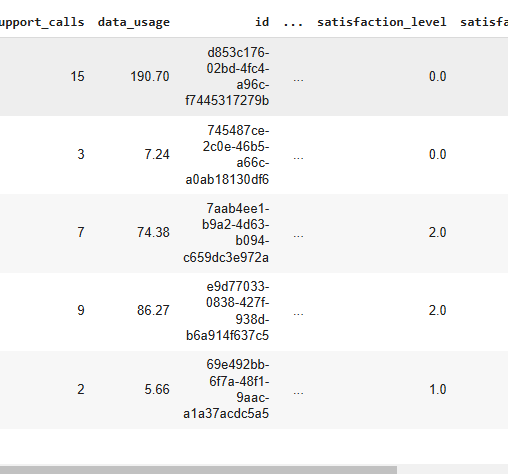

In [191]:
df.drop("id", inplace=True, axis=1)
val_df.drop("id", inplace=True, axis=1)
test_df.drop("id", inplace=True, axis=1)

In [188]:
customer_ids_train = df["id"]
customer_ids_val = val_df["id"]
customer_ids_test = test_df["id"]

In [193]:
X_train = df.drop(columns='churn')  # Hedef değişkeni dışarıda bırak
y_train = df['churn']


In [194]:
X_val = val_df.drop(columns='churn')
y_val = val_df['churn']

# LightGBM

In [84]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Modeli oluştur
model = LGBMClassifier(random_state=101, objective='binary', scale_pos_weight=5)

# Modeli eğit
model.fit(X_train, y_train)


y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Metrikleri hesapla
auc = roc_auc_score(y_val, y_prob)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Sonuçları yazdır
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


[LightGBM] [Info] Number of positive: 93321, number of negative: 7218439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 7311760, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012763 -> initscore=-4.348349
[LightGBM] [Info] Start training from score -4.348349
AUC: 0.8044
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


In [196]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42, k_neighbors=3,sampling_strategy= "minority")
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Orijinal veri dağılımı:", Counter(y_train))
print("SMOTE sonrası veri dağılımı:", Counter(y_resampled))


Orijinal veri dağılımı: Counter({0: 6875104, 1: 88997})
SMOTE sonrası veri dağılımı: Counter({0: 6875104, 1: 6875104})


In [197]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

model = LGBMClassifier(random_state=101, objective='binary', scale_pos_weight=5)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_prob)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


[LightGBM] [Info] Number of positive: 6875104, number of negative: 6875104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.621005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3083
[LightGBM] [Info] Number of data points in the train set: 13750208, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUC: 0.7087
Precision: 0.0305
Recall: 0.2450
F1-score: 0.0543


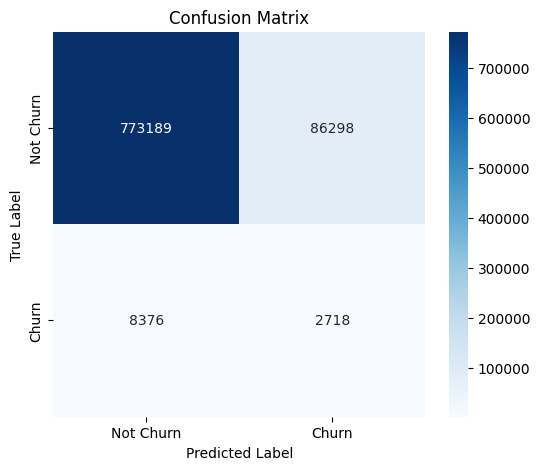

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val, y_pred)

labels = ["Not Churn", "Churn"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [120]:
model.feature_importances_

feats = pd.DataFrame(index=X_train.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance")
lgbm_imp_feats


,lgbm_importance
usage_intensity,4
total_usage,7
start_age,20
avg_call_duration,23
avg_top_up_count,30
service_type_Broadband,31
monthly_charge,37
service_type_Postpaid,45
roaming_usage,46
data_usage,48


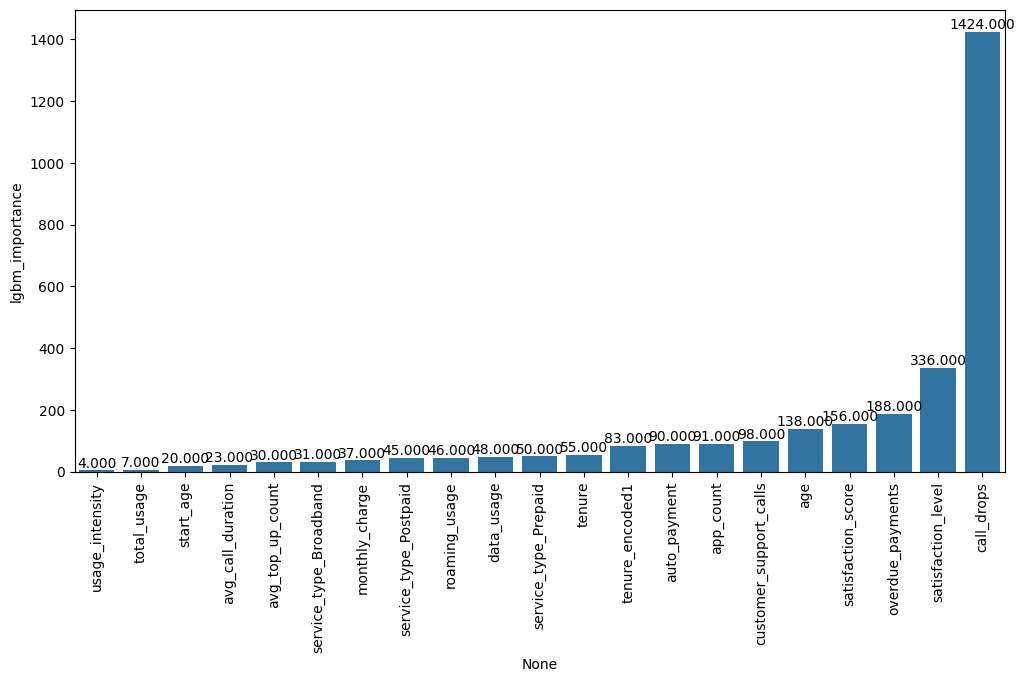

In [121]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

In [100]:
df['churn_probability'] = model.predict_proba(X_train)[:, 1]

churn_customers = df[df['churn_probability'] > 0.8]

churn_customers[['customer_id', 'churn_probability']]


KeyError: "['customer_id'] not in index"

In [97]:
import pandas as pd

df_results = pd.DataFrame({
    "Gerçek Değer": y_val,
    "Tahmin (0.5 threshold)": y_pred,
    "Tahmin Olasılığı": y_prob
})

print(df_results.sample(20))


        Gerçek Değer  Tahmin (0.5 threshold)  Tahmin Olasılığı
988045             0                       0          0.017884
755385             0                       1          0.541989
182805             0                       0          0.037045
264326             0                       0          0.220107
413013             0                       0          0.412573
41515              0                       0          0.022326
88293              0                       0          0.370153
700522             0                       0          0.152500
999562             0                       0          0.112725
723351             0                       0          0.206399
904409             0                       0          0.208964
352149             0                       0          0.058060
162671             0                       0          0.284514
584979             0                       0          0.048383
323714             0                       0          0

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test,y_pred)
cm

array([[1190068,  388279],
       [  13009,    8644]])

# XGB

In [233]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-5, 1e1),
    }

    model = xgb.XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_prob)
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print(f"En iyi hiperparametreler: {study.best_params}")
print(f"En iyi AUC: {study.best_value:.4f}")


[I 2025-02-07 22:14:37,584] A new study created in memory with name: no-name-7801fd32-46cc-4e12-9d42-2d30b765840e
[I 2025-02-07 22:15:10,979] Trial 0 finished with value: 0.7817824692925893 and parameters: {'learning_rate': 0.0001875928536222332, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8761062836827856, 'colsample_bytree': 0.7274696509352512, 'gamma': 0.011687286587345832}. Best is trial 0 with value: 0.7817824692925893.
[I 2025-02-07 22:16:50,145] Trial 1 finished with value: 0.7855508566298093 and parameters: {'learning_rate': 0.020116764989885558, 'max_depth': 10, 'n_estimators': 218, 'subsample': 0.6019838405576046, 'colsample_bytree': 0.6168232975742762, 'gamma': 4.407866034366121e-05}. Best is trial 1 with value: 0.7855508566298093.
[I 2025-02-07 22:17:03,567] Trial 2 finished with value: 0.7800954234501706 and parameters: {'learning_rate': 0.07396668042624611, 'max_depth': 4, 'n_estimators': 69, 'subsample': 0.5365662430535759, 'colsample_bytree': 0.6087906052046297,

En iyi hiperparametreler: {'learning_rate': 0.07829158368280782, 'max_depth': 4, 'n_estimators': 145, 'subsample': 0.8570772484377327, 'colsample_bytree': 0.962542317802195, 'gamma': 4.6400455643565165e-05}
En iyi AUC: 0.7881


In [198]:
import xgboost as xgb

model = xgb.XGBClassifier(
    random_state=101,
    objective='binary:logistic',
    learning_rate=0.0783,
    max_depth=4,
    n_estimators=145,
    subsample=0.8571,
    colsample_bytree=0.9625,
    gamma=4.64e-05,
    scale_pos_weight=5,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Modeli eğit
model.fit(X_resampled, y_resampled)

# Tahmin yap
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Metrikleri hesapla
auc = roc_auc_score(y_val, y_prob)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Sonuçları yazdır
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


AUC: 0.7269
Precision: 0.0267
Recall: 0.5853
F1-score: 0.0510


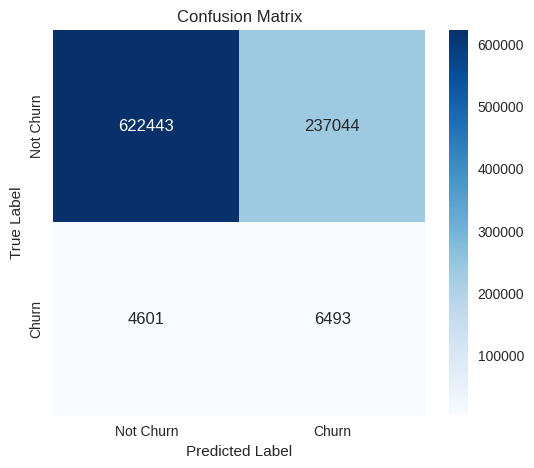

In [199]:
cm = confusion_matrix(y_val, y_pred)

labels = ["Not Churn", "Churn"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

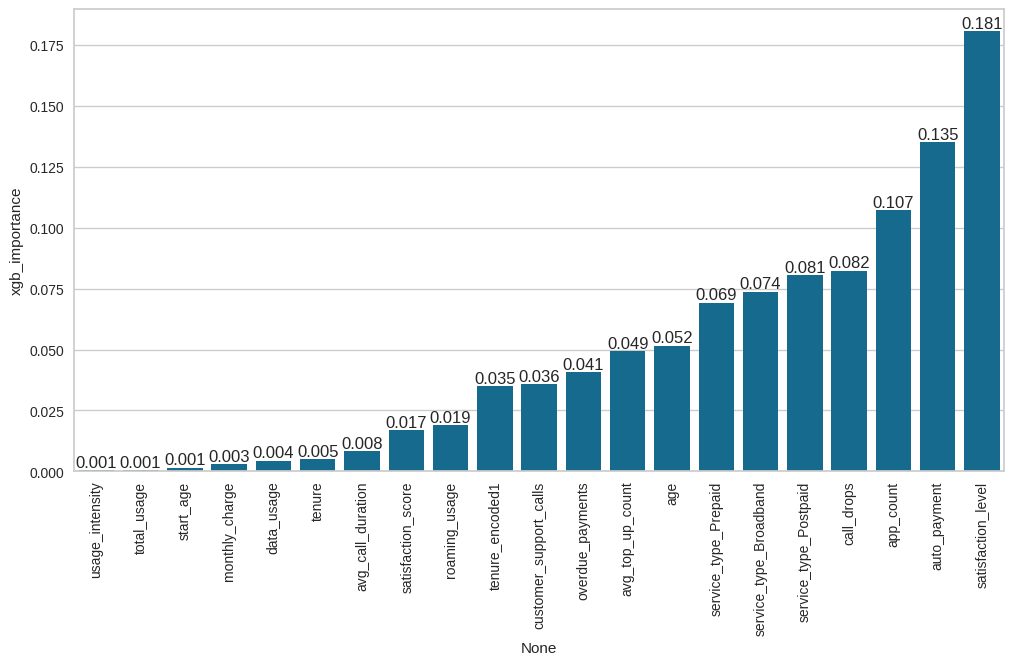

In [200]:
feats = pd.DataFrame(index=X_train.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")

plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

AttributeError: 'DataFrame' object has no attribute 'satisfaction_score'

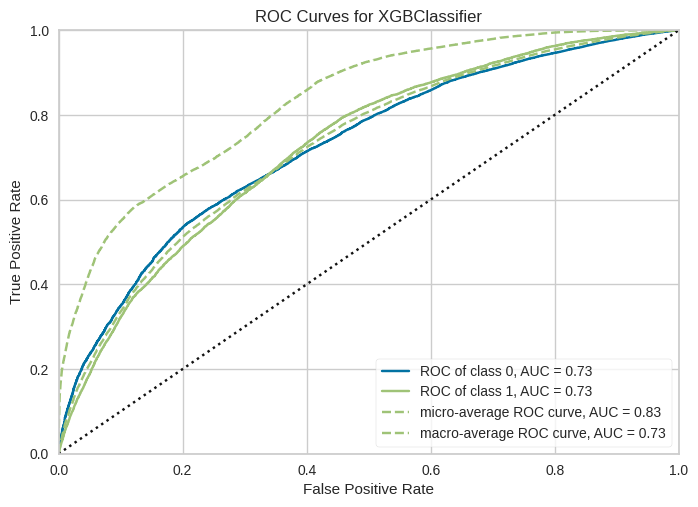

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [201]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()


# submmision

In [161]:
# Sütun sırasını değiştirme
test_df = test_df[[col for col in test_df.columns if col != 'satisfaction_level'] + ['satisfaction_level']]


In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869136 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     869136 non-null  int64  
 1   app_count               869136 non-null  int64  
 2   auto_payment            869136 non-null  int64  
 3   avg_call_duration       869136 non-null  float64
 4   avg_top_up_count        869136 non-null  int64  
 5   call_drops              869136 non-null  float64
 6   churn                   869136 non-null  int64  
 7   customer_support_calls  869136 non-null  int64  
 8   data_usage              869136 non-null  float64
 9   monthly_charge          869136 non-null  float64
 10  overdue_payments        869136 non-null  int64  
 11  roaming_usage           869136 non-null  float64
 12  satisfaction_level      869136 non-null  float64
 13  satisfaction_score      869136 non-null  float64
 14  service_type_Broadband  8

In [202]:
X_test = test_df.drop(columns='churn')
y_test = test_df['churn']

In [203]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

AUC: 0.7306
Precision: 0.0270
Recall: 0.5932
F1-score: 0.0516


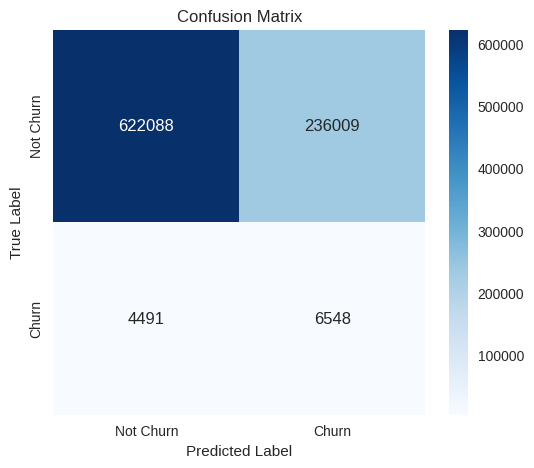

In [204]:
cm = confusion_matrix(y_test, y_pred)

labels = ["Not Churn", "Churn"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [162]:
df.to_csv("last_train_df.csv")
val_df.to_csv("last_val_df.csv")
test_df.to_csv("last_test_df.csv")

In [205]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[622088, 236009],
       [  4491,   6548]])

In [206]:
y_prob


array([0.07135126, 0.15530676, 0.21338691, ..., 0.33039692, 0.45139077,
       0.11102585], dtype=float32)

In [209]:
churn_list = pd.DataFrame({
    "customer_id": customer_ids_test,
    "churn_probability": y_prob,
    "churn": y_pred
})

churn_list_sorted = churn_list.sort_values(by="churn_probability", ascending=False)


In [226]:
churn_list = pd.DataFrame(X_test.copy())
churn_list["customer_id"] = customer_ids_test
churn_list["churn_probability"] = y_prob
churn_list["churn"] = y_pred

churn_list_sorted = churn_list.sort_values(by="churn_probability", ascending=False)

churn_list_sorted.head()


,age,app_count,auto_payment,avg_call_duration,avg_top_up_count,call_drops,customer_support_calls,data_usage,monthly_charge,overdue_payments,...,service_type_Postpaid,service_type_Prepaid,start_age,tenure,tenure_encoded1,total_usage,usage_intensity,customer_id,churn_probability,churn
39863,20,0,0,43.46,0,10.0,14,38.26,134.42,4,...,True,False,15,65,1.0,87.59,0.651614,429a73d9-297d-4ea6-b7d0-b971dc481cb4,0.962877,1
713337,20,0,0,105.36,0,9.0,14,94.70,137.97,3,...,True,False,12,97,2.0,248.37,1.800174,1dc8f173-05e0-4ce4-86ee-c55bef28471f,0.962290,1
407209,19,0,0,7.46,0,10.0,8,196.61,677.04,4,...,True,False,9,130,2.0,221.03,0.326465,52376f3a-3dda-4561-94e9-e39b4883f30a,0.962290,1
539249,21,0,0,83.40,0,10.0,15,149.76,1135.10,3,...,True,False,20,21,1.0,285.55,0.251564,d908a9e8-ad46-4b20-a41c-cec8856567e6,0.962034,1
892695,21,0,0,16.46,0,10.0,15,113.95,1136.96,3,...,True,False,20,21,1.0,135.65,0.119309,f9d2fdfc-6117-48ce-8a8e-1ea94d6086be,0.962034,1


In [233]:
churn_list_sorted.to_csv("churn_analysis_with_all_features.csv", index=False)


In [235]:
threshold = 0.50  # Churn olasılığı eşiği
high_risk_churn = churn_list_sorted[churn_list_sorted["churn_probability"] >= threshold]
high_risk_churn

,age,app_count,auto_payment,avg_call_duration,avg_top_up_count,call_drops,customer_support_calls,data_usage,monthly_charge,overdue_payments,...,service_type_Postpaid,service_type_Prepaid,start_age,tenure,tenure_encoded1,total_usage,usage_intensity,customer_id,churn_probability,churn
39863,20,0,0,43.46,0,10.0,14,38.26,134.42,4,...,True,False,15,65,1.0,87.59,0.651614,429a73d9-297d-4ea6-b7d0-b971dc481cb4,0.962877,1
713337,20,0,0,105.36,0,9.0,14,94.70,137.97,3,...,True,False,12,97,2.0,248.37,1.800174,1dc8f173-05e0-4ce4-86ee-c55bef28471f,0.962290,1
407209,19,0,0,7.46,0,10.0,8,196.61,677.04,4,...,True,False,9,130,2.0,221.03,0.326465,52376f3a-3dda-4561-94e9-e39b4883f30a,0.962290,1
539249,21,0,0,83.40,0,10.0,15,149.76,1135.10,3,...,True,False,20,21,1.0,285.55,0.251564,d908a9e8-ad46-4b20-a41c-cec8856567e6,0.962034,1
892695,21,0,0,16.46,0,10.0,15,113.95,1136.96,3,...,True,False,20,21,1.0,135.65,0.119309,f9d2fdfc-6117-48ce-8a8e-1ea94d6086be,0.962034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135757,18,0,0,98.22,26,19.0,6,142.11,1805.77,0,...,False,True,16,34,1.0,273.40,0.151404,4108624a-42fa-445a-af2a-bfc1dddbde2f,0.500002,1
938604,18,0,0,80.75,49,19.0,13,140.21,1047.04,0,...,False,True,14,50,1.0,271.38,0.259188,3f39a245-5ed7-4467-92b1-6f05348929aa,0.500002,1
956088,28,0,0,71.71,0,1.0,20,111.61,515.62,4,...,True,False,8,251,3.0,217.23,0.421299,e3df5998-a1d4-4fb6-8705-28a40a4e3a5a,0.500001,1
98375,35,0,0,116.30,0,1.0,20,155.04,449.61,3,...,True,False,13,265,3.0,278.22,0.618803,7efd1e6b-412a-4cb2-8d74-d0ff3fa0e35b,0.500001,1


In [237]:
churn_list_sorted.satisfaction_level.value_counts()

,count
satisfaction_level,
1.0,386800
2.0,288380
0.0,193956


In [238]:
df.groupby("satisfaction_level")["auto_payment"].value_counts()

satisfaction_level  auto_payment
0.0                 0               1010587
                    1                543250
1.0                 0               2010830
                    1               1080122
2.0                 0               1508666
                    1                810646
Name: count, dtype: int64

In [249]:
churn_list_sorted.columns

Index(['age', 'app_count', 'auto_payment', 'avg_call_duration',
       'avg_top_up_count', 'call_drops', 'customer_support_calls',
       'data_usage', 'monthly_charge', 'overdue_payments', 'roaming_usage',
       'satisfaction_level', 'satisfaction_score', 'service_type_Broadband',
       'service_type_Postpaid', 'service_type_Prepaid', 'start_age', 'tenure',
       'tenure_encoded1', 'total_usage', 'usage_intensity', 'customer_id',
       'churn_probability', 'churn'],
      dtype='object')

In [ ]:
df =churn_list_sorted.copy()

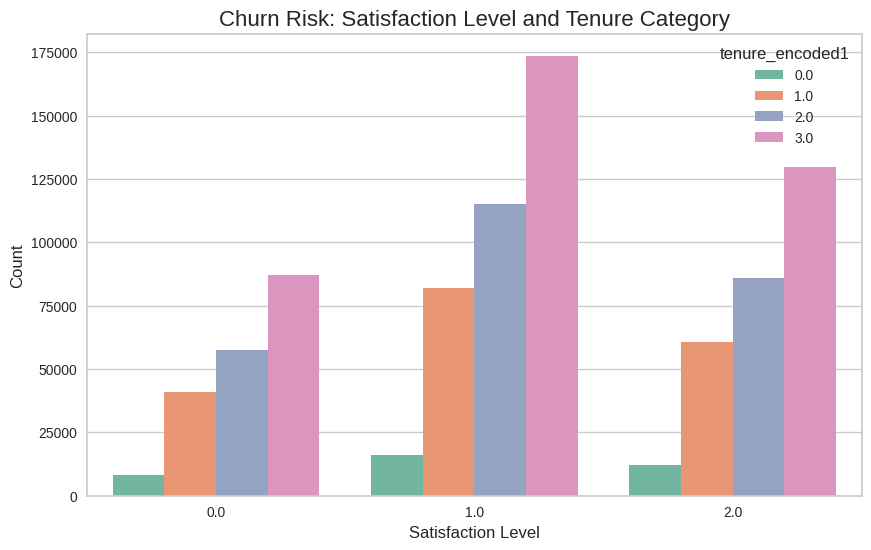

In [250]:
plt.figure(figsize=(10, 6))
sns.countplot(x="satisfaction_level", hue="tenure_encoded1", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Satisfaction Level and Tenure Category", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grafiği göster
plt.show()


In [252]:
# Satisfaction level ve Tenure kategorilerini etiketlere dönüştür
churn_list_sorted['satisfaction_level_label'] = churn_list_sorted['satisfaction_level'].map({0: "Low", 1: "Medium", 2: "High"})
churn_list_sorted['tenure_encoded1_label'] = churn_list_sorted['tenure_encoded1'].map({0: "New", 1: "Medium", 2: "Long"})


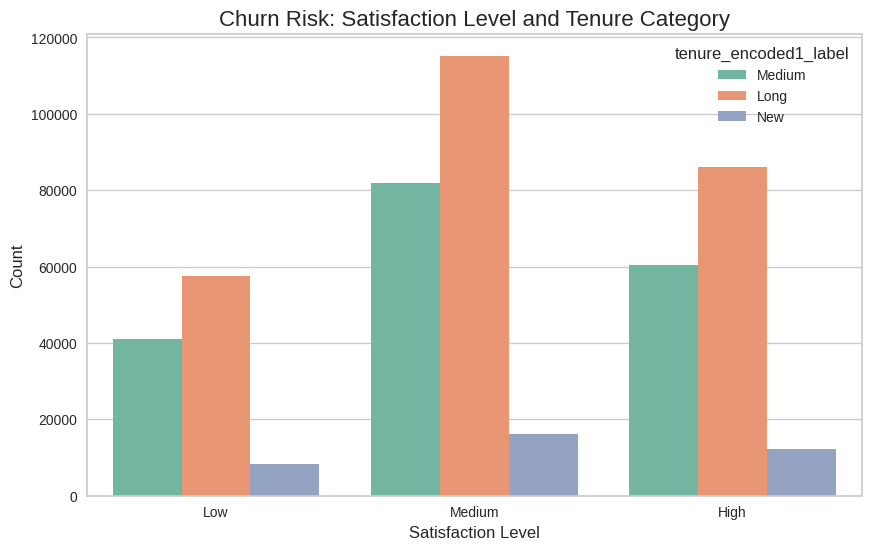

In [253]:
# Satisfaction Level ve Tenure kategorileri ile Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x="satisfaction_level_label", hue="tenure_encoded1_label", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Satisfaction Level and Tenure Category", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grafiği göster
plt.show()


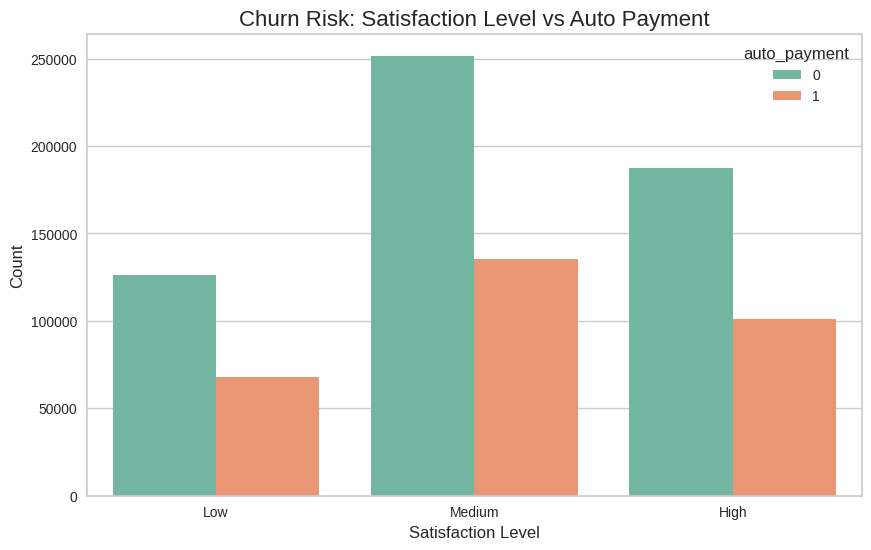

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(x="satisfaction_level_label", hue="auto_payment", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Satisfaction Level vs Auto Payment", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grafiği göster
plt.show()


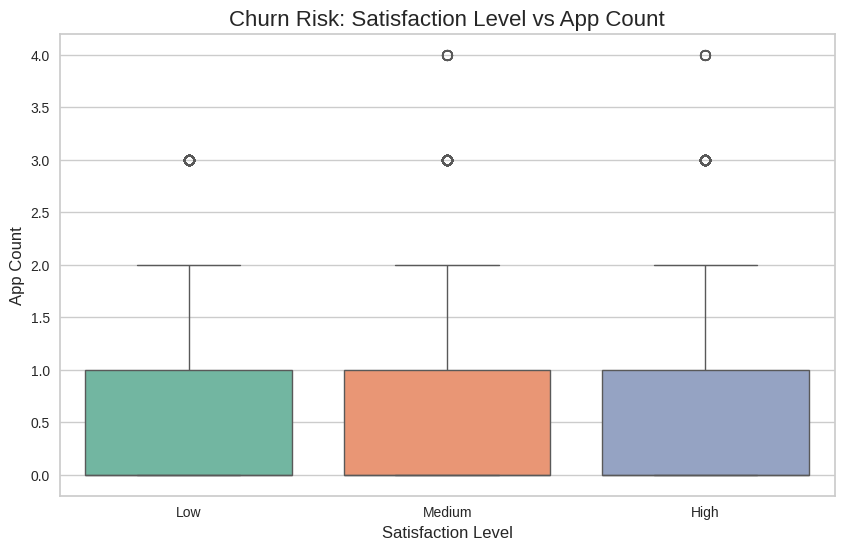

In [255]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="satisfaction_level_label", y="app_count", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Satisfaction Level vs App Count", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("App Count", fontsize=12)

# Grafiği göster
plt.show()


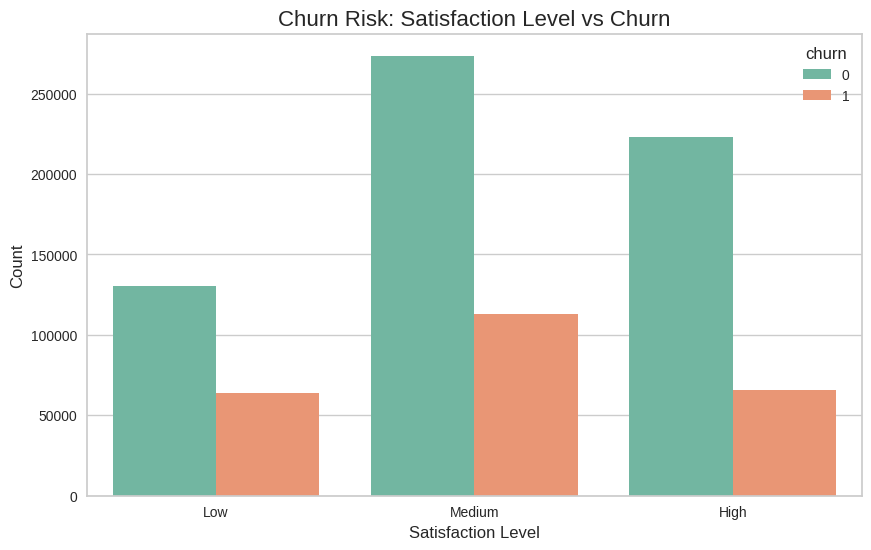

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(x="satisfaction_level_label", hue="churn", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Satisfaction Level vs Churn", fontsize=16)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grafiği göster
plt.show()


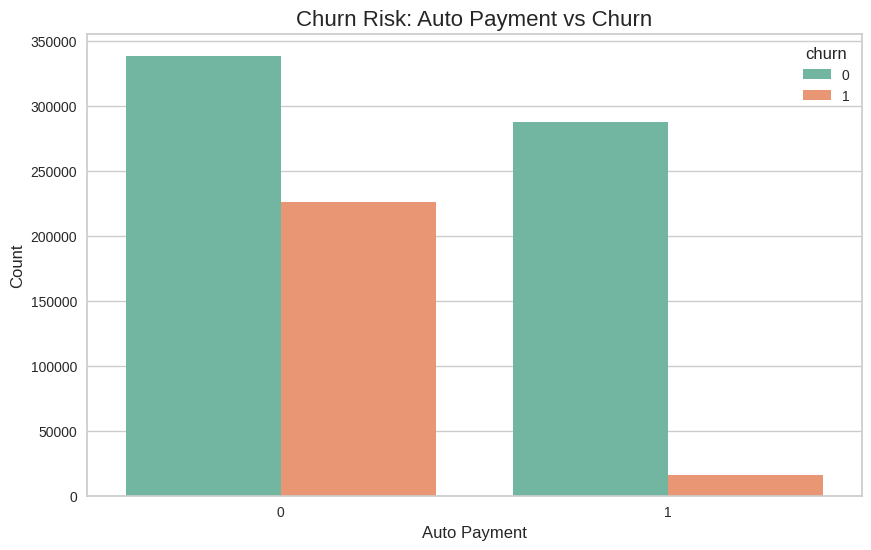

In [258]:
plt.figure(figsize=(10, 6))
sns.countplot(x="auto_payment", hue="churn", data=churn_list_sorted, palette="Set2")

# Başlık ve etiketler
plt.title("Churn Risk: Auto Payment vs Churn", fontsize=16)
plt.xlabel("Auto Payment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grafiği göster
plt.show()
